In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
   return np.linalg.norm(p - q)

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    return _dist(p,q) <= eps #true if within the circle

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]  # number of points (columns)
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    point = m[:, point_id]  #get the column for the specific point_id

    for p in range(n_points):
        if _eps_neighborhood(point, m[:, p], eps):
            seeds.append(p)
    return seeds

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core

    #find all points in the eps-neighborhood of the point_id
    seeds = _region_query(m, point_id, eps)
    
    # Check if point_id is a core point
    if len(seeds) < min_points:
        return False  # Not a core point, return False

    #update the classification of point_id to cluster_id
    classifications[point_id] = cluster_id
    
    #avoid processing the same point again
    seeds.remove(point_id)  
    
    while seeds:
        current_point = seeds.pop(0)

        if classifications[current_point] == NOISE:
            classifications[current_point] = cluster_id  #convert noise to part of the cluster

        if classifications[current_point] == UNCLASSIFIED:
            classifications[current_point] = cluster_id  #assign cluster_id

            #find neighbors of the current point
            new_neighbors = _region_query(m, current_point, eps)

            #if it's a core point, add its neighbors to the seeds list
            if len(new_neighbors) >= min_points:
                seeds.extend(new_neighbors)

    return True

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id += 1

    return classifications


In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

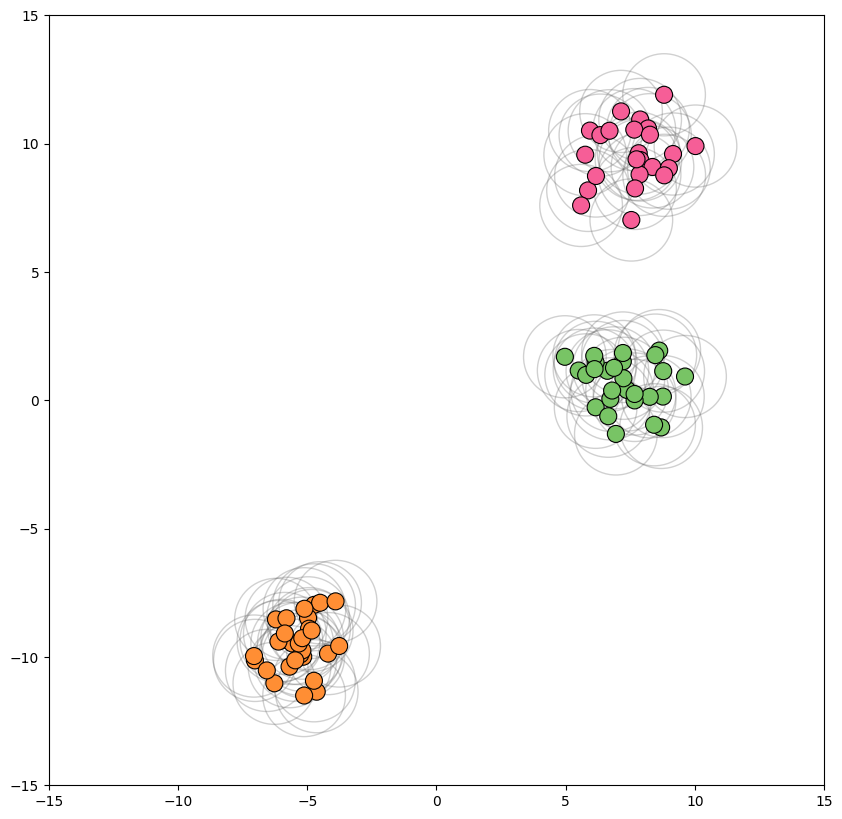

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

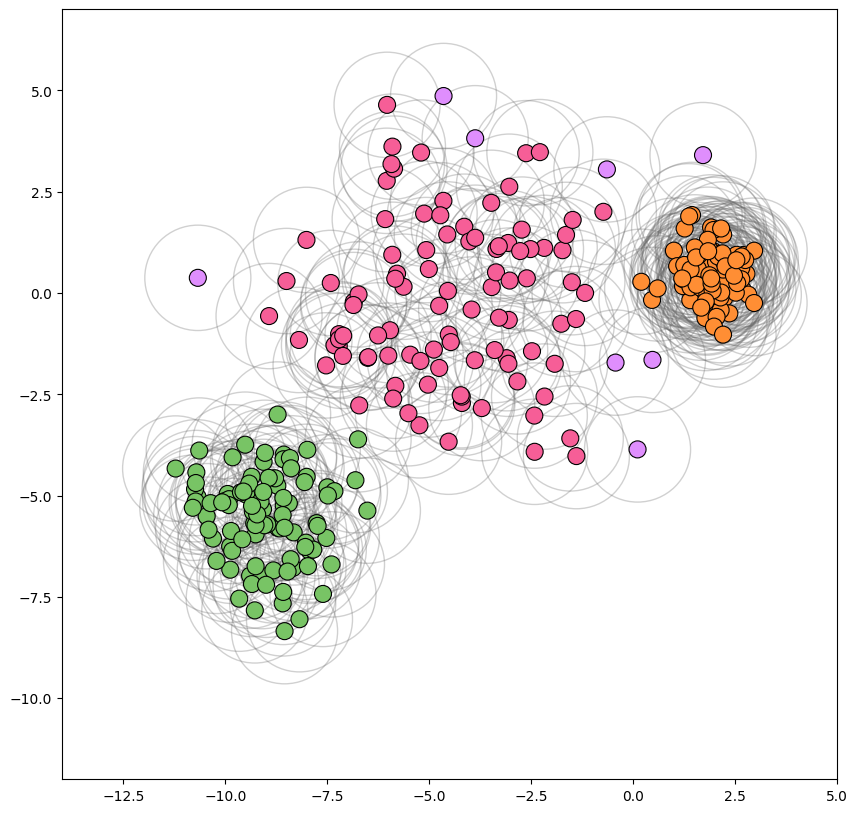

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
